# Session II
## How to create a multi class classification model in Python using Keras (using dense layers)?

## 1) Import Libraries and MNIST Fashion Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()


## 2) Investigate/ Examine dataset

In [ ]:
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# display unique labels
np.unique(train_labels)



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# just diplay what is at 0 index in train images
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

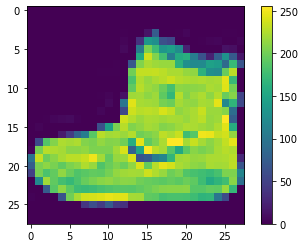

In [ ]:
# to plot that 0 indexed  images, we need to use imshow
plt.figure()
plt.grid(False)
plt.imshow(train_images[0])
plt.colorbar()
plt.show()


## 3) Images Scaling (Pre-processing of data)
the highest value of the pixel in an image is 255, so dividing every pixel by 255 will scale the pixel value between 0 and 1

In [ ]:
train_images / 255
test_images / 255


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

 MNIST fashion dataset has 10 classes

In [ ]:
class_labels_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress' , 'Coat', 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boot']


displaying first 25 images from the training dataset in a 5X5 Grid

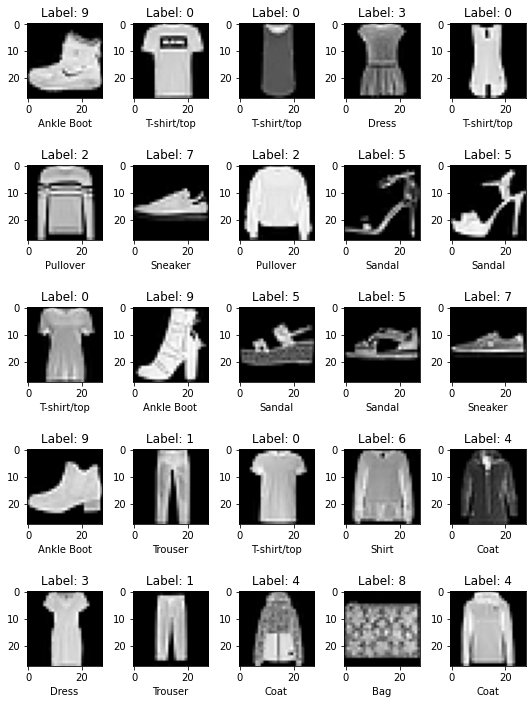

In [ ]:
# specify the number of rows and columns you want to see
num_row = 5
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = train_images[:num]
labels = train_labels[:num]
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.grid(False)
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.set_xlabel(class_labels_names[train_labels[i]])
plt.tight_layout()
plt.show()

## 4) Building the Neural Network Model

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
_________________________________________________________________


## 5) Compile the Model
While compiling the mode, three parameters are to be provided carefully. Loss is sparse_categorical crossentropy if labels are used as normal integers, otherwise use categorical crossentropy if the labels are encoded using one hot encoding.

In [ ]:
#from tensorflow.python.keras.optimizers import Adam


model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## 6) Fit the Model

In [ ]:
history=model.fit(train_images, train_labels,  epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6551 - accuracy: 0.4859
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8475 - accuracy: 0.6605
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6477 - accuracy: 0.7391
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5925 - accuracy: 0.7657
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5330 - accuracy: 0.8015
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4941 - accuracy: 0.8145
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4729 - accuracy: 0.8207
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4589 - accuracy: 0.8257
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4453 - accuracy: 0.8342
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.438

# 7) Plot Learning Curves - Diagnostics Plots

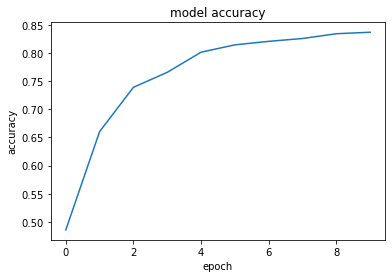

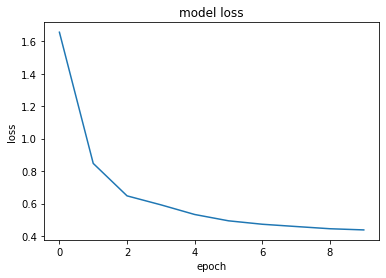

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 8) Make Predictions

In [ ]:
predictions=model.predict(test_images)
predictions

array([[5.9804126e-05, 2.2051916e-09, 2.1622817e-07, ..., 5.9578106e-02,
        3.2982025e-05, 8.9995563e-01],
       [9.6546747e-03, 2.4755573e-04, 7.7743244e-01, ..., 5.9008718e-05,
        3.7031155e-03, 2.8127481e-05],
       [6.2740317e-28, 1.0000000e+00, 2.6123113e-23, ..., 0.0000000e+00,
        7.2075854e-26, 0.0000000e+00],
       ...,
       [1.3646131e-06, 1.6001379e-19, 3.4469883e-06, ..., 2.6895248e-06,
        9.9996471e-01, 3.5605627e-09],
       [5.2963092e-19, 9.9999332e-01, 2.6634718e-15, ..., 0.0000000e+00,
        1.9585174e-17, 0.0000000e+00],
       [2.0680041e-06, 5.2659665e-08, 2.4282901e-10, ..., 3.4261435e-02,
        2.4043859e-03, 3.7986535e-04]], dtype=float32)

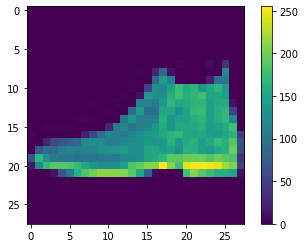

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

In [ ]:
y_pred = np.argmax(predictions, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## 8) Evaluating the Model

In [ ]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4913 - accuracy: 0.8247


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, y_pred))

[[753   2   4  81  10   1 146   0   3   0]
 [  0 958   0  22  13   0   7   0   0   0]
 [  7   0 605  10 122   0 256   0   0   0]
 [  9  18   2 858  75   0  37   0   1   0]
 [  1   0  48  20 768   0 162   0   1   0]
 [  1   0   0   1   0 938   0  26  13  21]
 [134   2 140  58 140   0 521   0   5   0]
 [  0   0   4   0   0  18   2 945   3  28]
 [  1   0   0   3   5   1  39   2 949   0]
 [  0   0   0   0   0  11   0  36   1 952]]


## a) Draw a Confusion Matrix

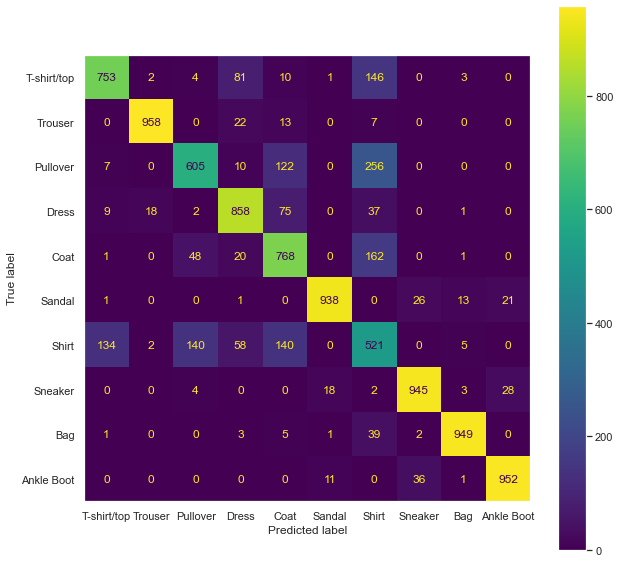

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(test_labels, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress' , 'Coat', 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

## b) Print the Classification Report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy Score :',accuracy_score(test_labels, y_pred))
print ('Report : ')
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress' , 'Coat', 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boot']
print (classification_report(test_labels, y_pred, target_names=target_names))

Accuracy Score : 0.8247
Report : 
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.75      0.79      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.75      0.60      0.67      1000
       Dress       0.81      0.86      0.84      1000
        Coat       0.68      0.77      0.72      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.45      0.52      0.48      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.97      0.95      0.96      1000
  Ankle Boot       0.95      0.95      0.95      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.83     10000
weighted avg       0.83      0.82      0.83     10000

